# Insurance Premium Prediction

## Problem Statement:

#### Attribute Information

In [1]:
#import neccesary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [3]:
#import dataset
df = pd.read_csv('insurance.csv')

## EDA

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#data types are correct

In [7]:
#separating numeric and categorical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
cat_col = [col for col in df.columns if df[col].dtypes == 'O']

In [8]:
num_col

['age', 'bmi', 'children', 'expenses']

In [9]:
data_num = df[num_col]

In [10]:
data_num

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [11]:
cat_col

['sex', 'smoker', 'region']

In [12]:
data_cat = df[cat_col]

In [13]:
data_cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [14]:
#checking for null values
df.isnull().sum().sum()

0

In [15]:
# checking for duplicates rows
df.duplicated().sum()

1

In [16]:
#removing duplicate row.
df.drop_duplicates(inplace = True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [19]:
#checking distribution of dataset
#Normality Test

In [20]:
from scipy.stats import normaltest

In [21]:
normaltest(data_num['age'])[1]*100

0.0

C:\Users\anike\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

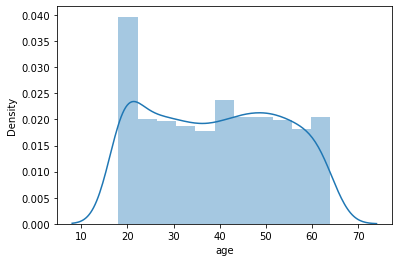

In [22]:
sns.distplot(data_num['age'])

In [23]:
normaltest(data_num['bmi'])[1]*100

0.014625501608173452

In [24]:
normaltest(data_num['children'])[1]*100

8.457892706503516e-31

In [25]:
normaltest(data_num['expenses'])[1]*100

7.019803158360419e-72

In [26]:
# column 'age','children','expenses' are not normally distributed. 'bmi' is right skewed

In [27]:
df['bmi'].skew()

0.28446275054239506

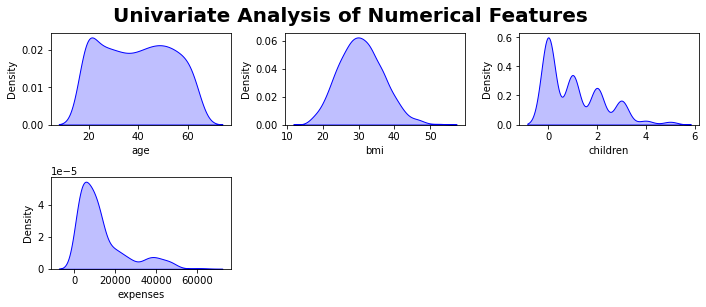

In [28]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

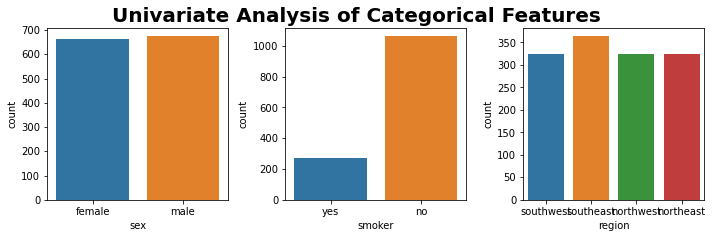

In [29]:
plt.figure(figsize=(10,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(cat_col)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=df[cat_col[i]],data = df)
    plt.xlabel(cat_col[i])
    plt.tight_layout()

In [30]:
#smoker feature is imbalanced

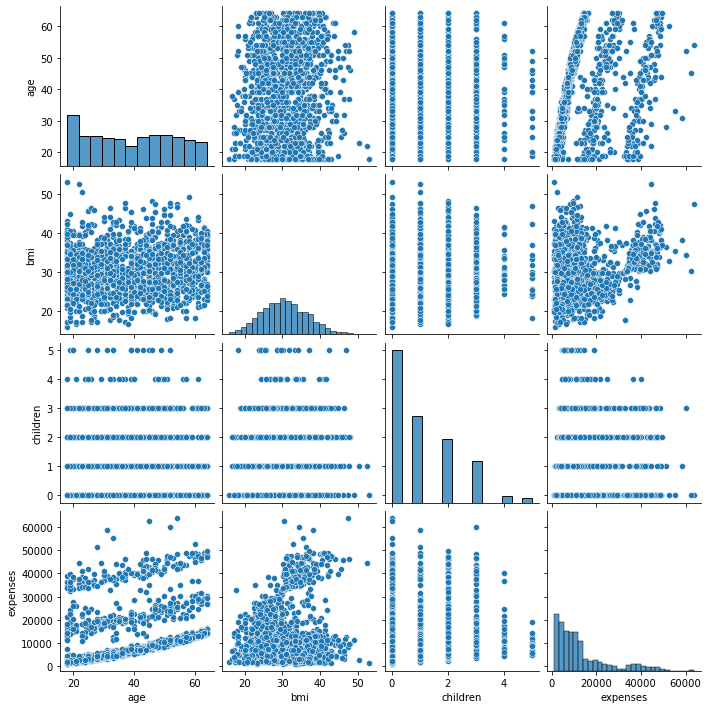

In [31]:
sns.pairplot(data = df)

In [32]:
# no linear relationship between target columns and input columns

<AxesSubplot:xlabel='sex', ylabel='expenses'>

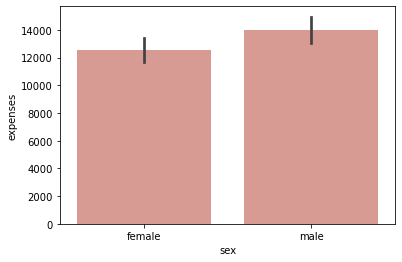

In [33]:
sns.barplot(x="sex", y="expenses", data=df,
                     color="salmon", saturation=.5)

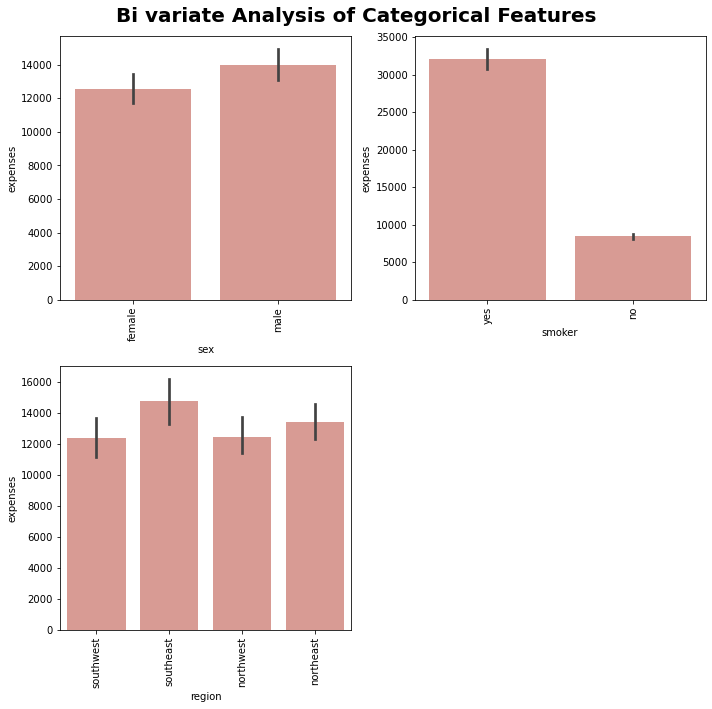

In [34]:
plt.figure(figsize=(10,10))
plt.suptitle('Bi variate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(cat_col)):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=df[cat_col[i]], y="expenses", data=df,
                     color="salmon", saturation=.5)
    plt.xlabel(cat_col[i])
    plt.xticks(rotation = 90)

    plt.tight_layout()

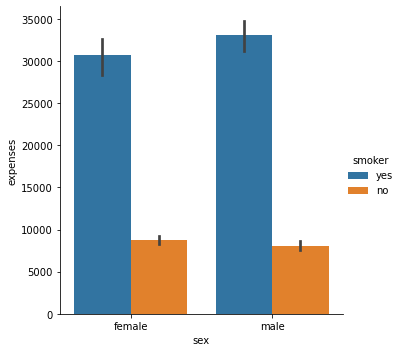

In [35]:
sns.catplot(x="sex", y="expenses",
                   hue="smoker",
                    data=df, kind="bar")

In [36]:
#those people are smokers have high % of health insurance

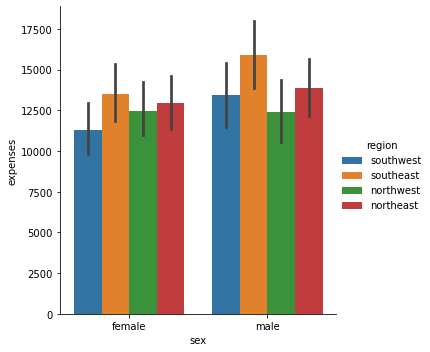

In [37]:
sns.catplot(x="sex", y="expenses",
                   hue="region",
                    data=df, kind="bar")

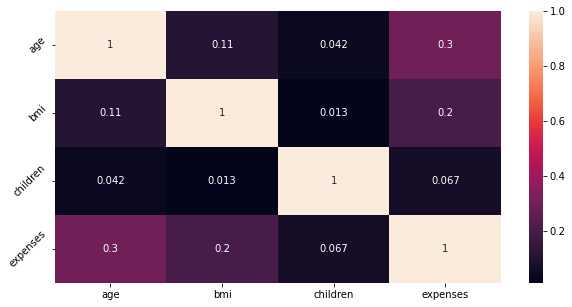

In [38]:
# In numerical column
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)
plt.yticks(rotation=45)
plt.show()

In [39]:
# no multicollinearity

## Outlier handling

#### 1. Box Plot

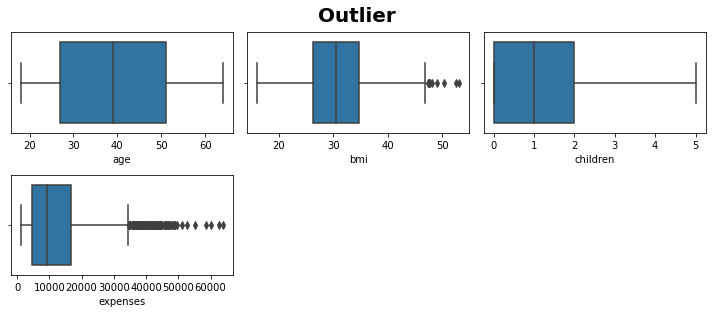

In [40]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [41]:
#outlier are present in 'bmi' and 'expenses' feature

#### 2.Z score method

#since data is not normally distributed z score method not used.

#### 3.Inter Qauntile Method

In [42]:
def handling_outliers(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print("______________________________________________")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence


In [43]:
for columns in data_num:
    handling_outliers(data_num,columns)

age --- IQR ---> 24.0
Lower Fence: -9.0
Higher Fence: 87.0
______________________________________________
bmi --- IQR ---> 8.400000000000002
Lower Fence: 13.699999999999998
Higher Fence: 47.300000000000004
______________________________________________
children --- IQR ---> 2.0
Lower Fence: -3.0
Higher Fence: 5.0
______________________________________________
expenses --- IQR ---> 11899.6275
Lower Fence: -13109.15375
Higher Fence: 34489.35625
______________________________________________


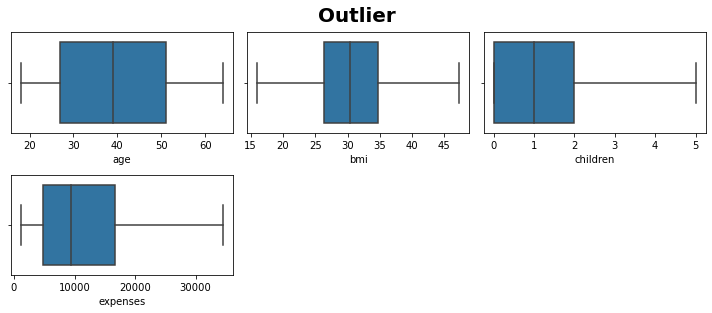

In [44]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data_num[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [45]:
df_new = pd.concat([data_num,data_cat],axis= 1)

In [ ]:
#Saving dataset to file 'cleaned_dataset'

In [48]:
df_new.to_csv('cleaned_dataset.csv')

In [49]:
df_new.head()

,age,bmi,children,expenses,sex,smoker,region
0,19,27.9,0,16884.92,female,yes,southwest
1,18,33.8,1,1725.55,male,no,southeast
2,28,33.0,3,4449.46,male,no,southeast
3,33,22.7,0,21984.47,male,no,northwest
4,32,28.9,0,3866.86,male,no,northwest


In [50]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [52]:
X_train.shape

(895, 6)

In [53]:
y_train.shape

(895,)

In [54]:
X_test.shape

(442, 6)

In [55]:
y_test.shape

(442,)

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [60]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear Regression

In [74]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = LinearRegression()

pipe_lr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_lr.fit(X_train,y_train)

y_pred = pipe_lr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.7298489841358502
MAE 4082.0925094455984
MSE 36358313.50883439
RMSE 6029.78552759834


In [164]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    pipe_lr.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [165]:
scores[np.argmax(scores)]

0.9766528378733148

### Ridge Regression

In [75]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe_ridge = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_ridge.fit(X_train,y_train)

y_pred = pipe_ridge.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7330320608776898
MAE 4159.653316780838


### Lasso Regression

In [76]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe_lasso = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_lasso.fit(X_train,y_train)

y_pred = pipe_lasso.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7298489869928436
MAE 4082.092903727407


### K Nearest Neighbour

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=6)

pipe_knn = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_knn.fit(X_train,y_train)

y_pred = pipe_knn.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.11196313142425474
MAE 7585.010588235295


### Decision Tree Regressor

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=4)

pipe_dt = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_dt.fit(X_train,y_train)

y_pred = pipe_dt.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8272210101745593
MAE 2880.5468809169943


### SVR

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = SVR()

pipe_svr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_svr.fit(X_train,y_train)

y_pred = pipe_svr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score -0.08684931160035503
MAE 7950.815758677759


### Random Forest Regressor

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.1,
                              max_features=0.75,
                              max_depth=5)

pipe_rf = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rf.fit(X_train,y_train)

y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8337650846582915
MAE 2701.4825393052547


### Extra Tree Regressor

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=80,
                              random_state=3,
                              max_features=0.75,
                              max_depth=10)

pipe_xt = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_xt.fit(X_train,y_train)

y_pred = pipe_xt.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8131253203448993
MAE 2831.688655699604


### AdaBoostRegressor

In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=50,learning_rate=0.01,random_state = 1)

pipe_ab = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_ab.fit(X_train,y_train)

y_pred = pipe_ab.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8397207888850182
MAE 2883.6654822558376


### GradientBoostRegressor

In [123]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=50)

pipe_gb = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_gb.fit(X_train,y_train)

y_pred = pipe_gb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8395598818435994
MAE 2595.8379141245778


### XgBoostRegressor

In [148]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=2,max_depth=4,learning_rate=1)

pipe_xgb = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_xgb.fit(X_train,y_train)

y_pred = pipe_xgb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8231247996369733
MAE 2893.6324863789414


### VotingRegressor

In [149]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe_vr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_vr.fit(X_train,y_train)

y_pred = pipe_vr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8312286627563457
MAE 2709.8076678211833


### StackingRegressor

In [150]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,4,5])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe_sr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_sr.fit(X_train,y_train)

y_pred = pipe_sr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8347298046630337
MAE 2596.6448708829876


In [166]:
import pickle
pickle.dump(pipe_ab,open('pipe.pkl','wb'))